# Linear regression

In this notebook I deploy a linear rgression model using the crime dataset from UCI http://www.statsci.org/data/general/uscrime.txt data dictionary available at http://www.statsci.org/data/general/uscrime.html

A test point for the model is listed below:

* M = 14.0
* So = 0
* Ed = 10.0
* Po1 = 12.0
* Po2 = 15.5
* LF = 0.640
* M.F = 94.0
* Pop = 150
* NW = 1.1
* U1 = 0.120
* U2 = 3.6
* Wealth = 3200
* Ineq = 20.1
* Prob = 0.04
* Time = 39.0



### Load libraries and set seed



In [1]:
library(ggplot2)
library(dplyr)
library(corrplot)
library(corrgram)
library(outliers)
library(caret)
set.seed(37)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'corrplot' was built under R version 3.4.3"corrplot 0.84 loaded
Warning message:
"package 'corrgram' was built under R version 3.4.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.4.3"



### Load data and check head



In [2]:
data <- read.table('uscrime.txt', header=T)
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682




### Check str of data



In [3]:
str(data)

'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635 578 1969 1234 682 963 1555 



### Check summary of data



In [4]:
summary(data)

       M               So               Ed             Po1       
 Min.   :11.90   Min.   :0.0000   Min.   : 8.70   Min.   : 4.50  
 1st Qu.:13.00   1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25  
 Median :13.60   Median :0.0000   Median :10.80   Median : 7.80  
 Mean   :13.86   Mean   :0.3404   Mean   :10.56   Mean   : 8.50  
 3rd Qu.:14.60   3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45  
 Max.   :17.70   Max.   :1.0000   Max.   :12.20   Max.   :16.60  
      Po2               LF              M.F              Pop        
 Min.   : 4.100   Min.   :0.4800   Min.   : 93.40   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:0.5305   1st Qu.: 96.45   1st Qu.: 10.00  
 Median : 7.300   Median :0.5600   Median : 97.70   Median : 25.00  
 Mean   : 8.023   Mean   :0.5612   Mean   : 98.30   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:0.5930   3rd Qu.: 99.20   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :0.6410   Max.   :107.10   Max.   :168.00  
       NW              U1                U2            



### Exploratory data analysis

First lets start with some exploratory data analysis. Let's explore the target variable `Crime`  first. Then we'll look at the correlation between predictor variables.





### Histogram of target variable `Crime`



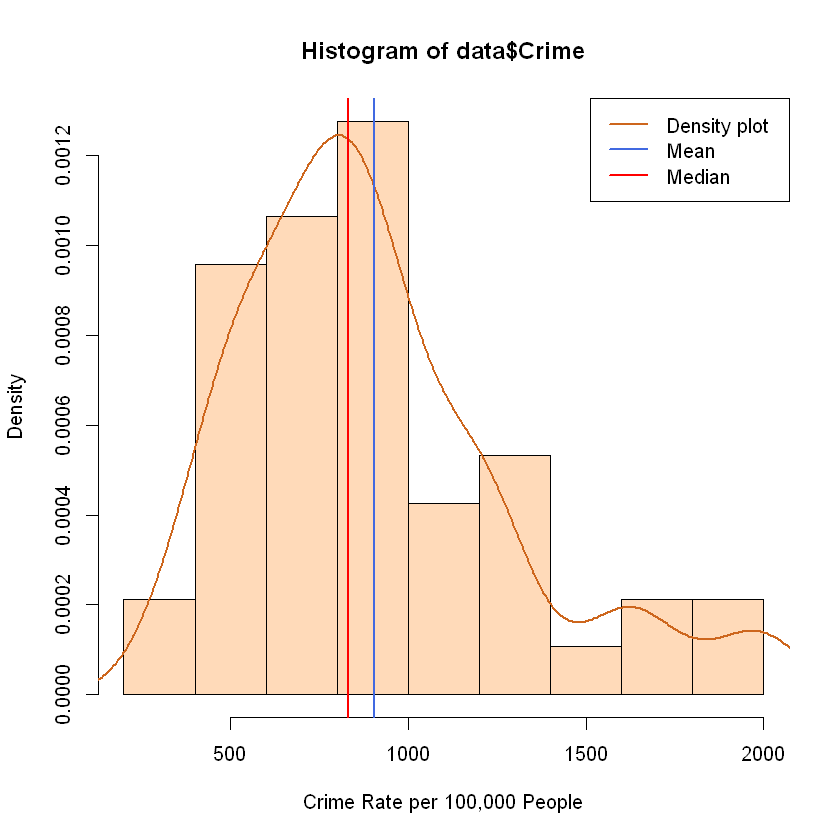

In [5]:
# reference: https://www.r-bloggers.com/adding-measures-of-central-tendency-to-histograms-in-r/

hist(data$Crime, probability = T,
     col = "peachpuff",
     xlab="Crime Rate per 100,000 People")
lines(density(data$Crime), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")
abline(v = mean(data$Crime),
 col = "royalblue",
 lwd = 2)
abline(v = median(data$Crime),
 col = "red",
 lwd = 2)
legend(x = "topright", # location of legend within plot area
 c("Density plot", "Mean", "Median"),
 col = c("chocolate3", "royalblue", "red"),
 lwd = c(2, 2, 2))



### Box-and-Whisker plot of target variable `Crime`

reference: https://www.rdocumentation.org/packages/graphics/versions/3.4.3/topics/boxplot


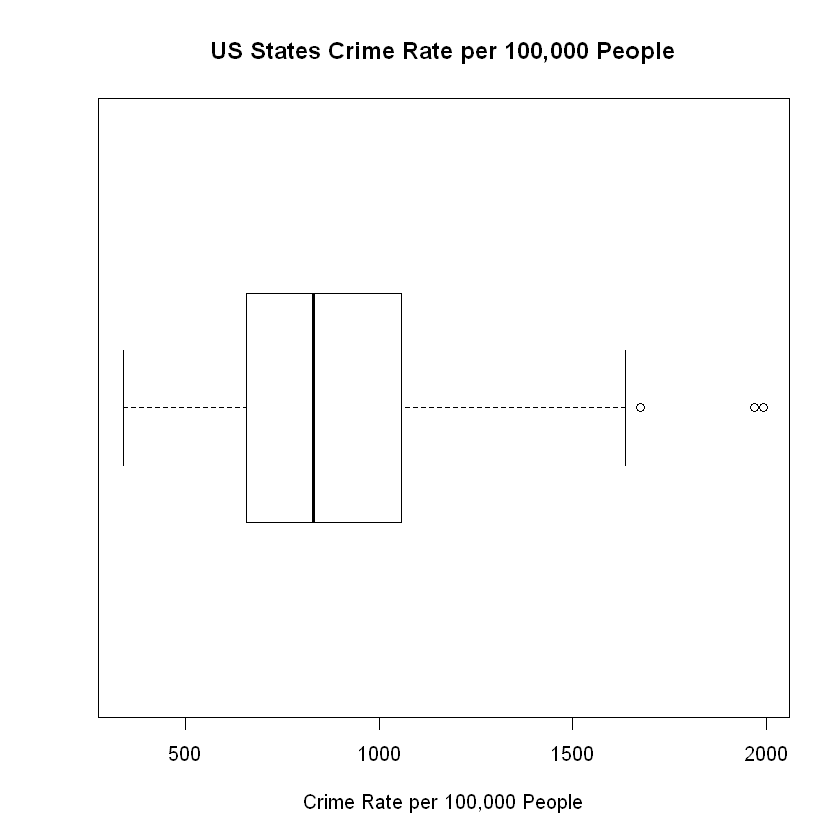

In [6]:
# reference: https://www.rdocumentation.org/packages/graphics/versions/3.4.3/topics/boxplot

boxplot(data$Crime, horizontal = T,
        xlab="Crime Rate per 100,000 People",
        main="US States Crime Rate per 100,000 People")



### Q-Q plot of target variable `Crime`

A Q-Q plot tests our input data for normality. If the data is normally distributed, we should be able to draw a line through all the data points that intercepts at the origin.



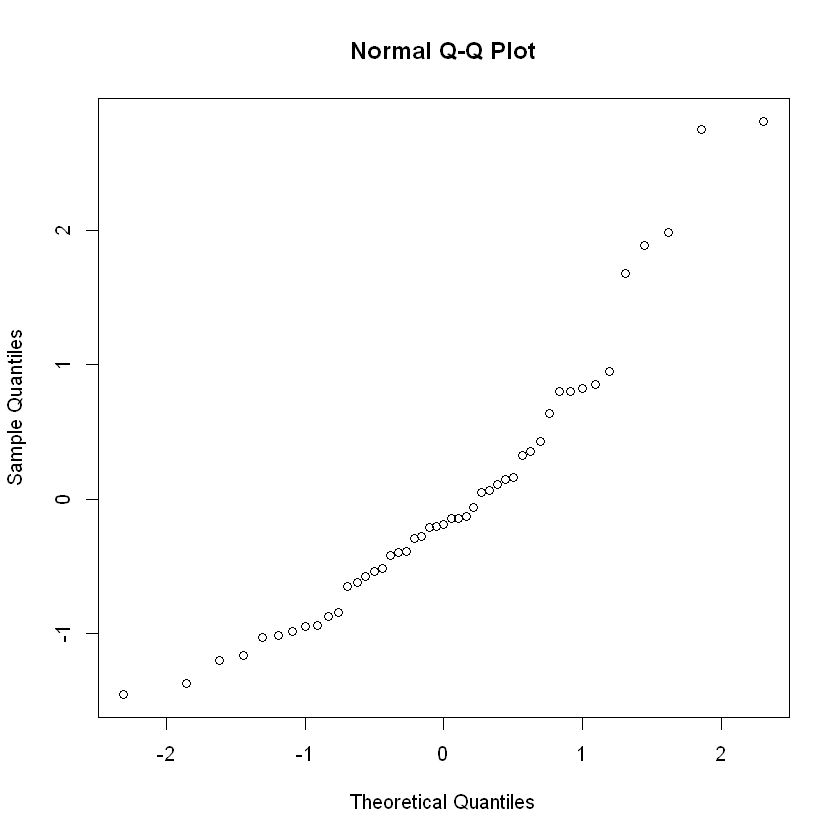

In [7]:
qqnorm(scale(data$Crime))



From the visual evidence provided above, we can definitely prove that we have some high-end outliers present in our target variable `Crime`. Now that we have explored the target variable, lets turn our focus to the predictor variables.





Our crime data is skewed towards the high-end. The histogram above proves this observation as the mean is greater than the median. The tail on the right-hand side of the normal distribution further illustrates the skew present in our data. A box-and-whisker and Q-Q plot will further help to identify outliers present. Outliers leave us with a decision to make:

*Do we throw out the outliers for the purposes of our linear regression model?*

The answer to this question is highly dependent on the given context the linear regression model is being built for. For the purposes of this model, we will build models with the high-end outliers present to compare different model's performance. Including the highend outliers for crime rates depends on the original intent of the study. If one was trying to discover what drove higher crime rates, including high-end outliers in one model and removing them in another model and comparing the differences in model output would be an appropriate approach.





### Correlation between predictors



In [8]:
# Grab only numeric columns
numeric_columns <- sapply(data, is.numeric)

# Filter to numeric columns for correlation
data_for_corr_plot <- cor(data[,numeric_columns])

data_for_corr_plot

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
M,1.00000000,0.58435534,-0.53023964,-0.50573690,-0.51317336,-0.1609488,-0.02867993,-0.28063762,0.59319826,-0.224380599,-0.24484339,-0.6700550558,0.63921138,0.361116408,0.1145107190,-0.08947240
So,0.58435534,1.00000000,-0.70274132,-0.37263633,-0.37616753,-0.5054695,-0.31473291,-0.04991832,0.76710262,-0.172419305,0.07169289,-0.6369454328,0.73718106,0.530861993,0.0668128312,-0.09063696
Ed,-0.53023964,-0.70274132,1.00000000,0.48295213,0.49940958,0.5611780,0.43691492,-0.01722740,-0.66488190,0.018103454,-0.21568155,0.7359970363,-0.76865789,-0.389922862,-0.2539735471,0.32283487
Po1,-0.50573690,-0.37263633,0.48295213,1.00000000,0.99358648,0.1214932,0.03376027,0.52628358,-0.21370878,-0.043697608,0.18509304,0.7872252807,-0.63050025,-0.473247036,0.1033577449,0.68760446
Po2,-0.51317336,-0.37616753,0.49940958,0.99358648,1.00000000,0.1063496,0.02284250,0.51378940,-0.21876821,-0.051711989,0.16922422,0.7942620503,-0.64815183,-0.473027293,0.0756266536,0.66671414
LF,-0.16094882,-0.50546948,0.56117795,0.12149320,0.10634960,1.0000000,0.51355879,-0.12367222,-0.34121444,-0.229399684,-0.42076249,0.2946323090,-0.26988646,-0.250086098,-0.1236404364,0.18886635
M.F,-0.02867993,-0.31473291,0.43691492,0.03376027,0.02284250,0.5135588,1.00000000,-0.41062750,-0.32730454,0.351891900,-0.01869169,0.1796086363,-0.16708869,-0.050858258,-0.4276973791,0.21391426
Pop,-0.28063762,-0.04991832,-0.01722740,0.52628358,0.51378940,-0.1236722,-0.41062750,1.00000000,0.09515301,-0.038119948,0.27042159,0.3082627091,-0.12629357,-0.347289063,0.4642104596,0.33747406
NW,0.59319826,0.76710262,-0.66488190,-0.21370878,-0.21876821,-0.3412144,-0.32730454,0.09515301,1.00000000,-0.156450020,0.08090829,-0.5901070652,0.67731286,0.428059153,0.2303984071,0.03259884
U1,-0.22438060,-0.17241931,0.01810345,-0.04369761,-0.05171199,-0.2293997,0.35189190,-0.03811995,-0.15645002,1.000000000,0.74592482,0.0448572017,-0.06383218,-0.007469032,-0.1698528383,-0.05047792





This is hard to look at and doesn't provide much value to the user without going line-by-line! Let's color it using the `corrplot`  function. For more on `corrplot`  see the documentation: https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html



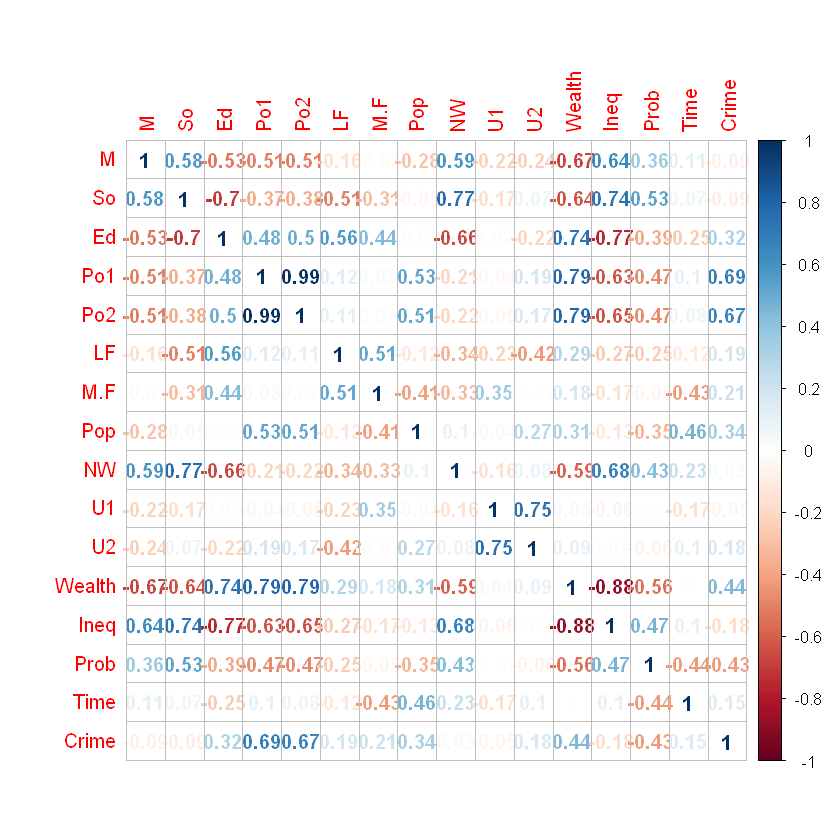

In [9]:
corrplot(data_for_corr_plot,method='number')

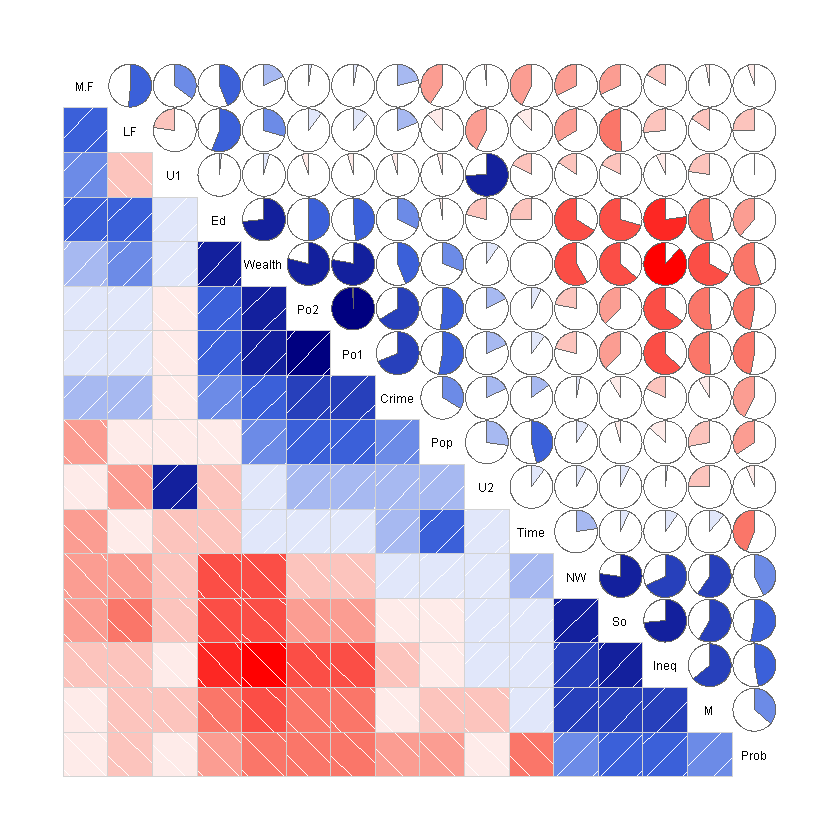

In [10]:
corrgram(data,order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt)



Tt appears that Po1 , Po2 , Wealth , and Ed are the most highly correlated predictors with crime.

We can also see from the corrplots above, that Po1 and Po2 are highly correlated with each other and with regards to the target variable `Crime`. Because, of this we can eliminate one variable or the other without significant decrement to model prediction accuracy. This is because both variables are contributing nearly identical information (Po1 is per-capita police force expenditures in 1960 and Po2 is per-capita police force expenditures in 1959) to the model. This also tells us that Po1 and Po2 spending did not increase significantly from 1959 to 1960. Let's confirm this visually below:



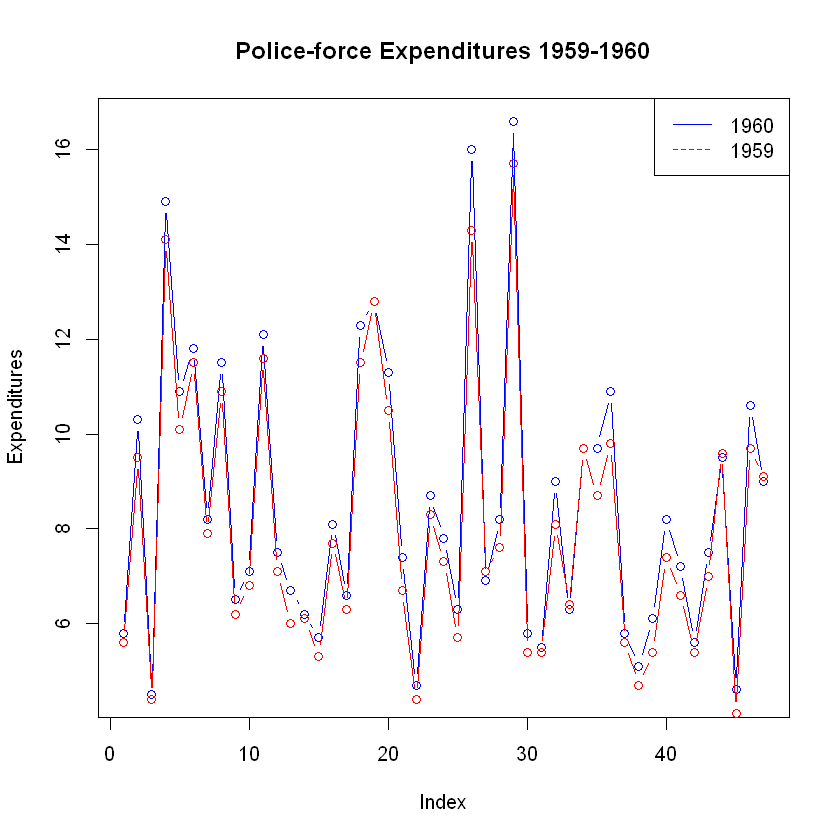

In [11]:
# reference: https://stackoverflow.com/a/2564276
# http://www.sthda.com/english/wiki/add-legends-to-plots-in-r-software-the-easiest-way

plot(data$Po1, type='b', col='blue',
     main='Police-force Expenditures 1959-1960',
     ylab='Expenditures')
lines(data$Po2, col='red', type='b')
legend(x='topright', legend=c("1960", "1959"),
       col=c("blue", "red"), lty=1:2)



### Linear regression model building: split data

First let's split the data into training, validation, and test sets. I will use a 85-15 split and a cross-validated approach using caret.

reference: https://stackoverflow.com/a/36069362





### Manual 85-15 data split



In [12]:
spec = c(train = .85,
         validate = .15)

g = sample(cut(
  seq(nrow(data)), 
  nrow(data)*cumsum(c(0,spec)),
  labels = names(spec)
))

split_data_set = split(data, g)

In [13]:
attributes(split_data_set)

$names
[1] "train"    "validate"

In [14]:
sapply(split_data_set, nrow)/nrow(data)

train  validate 
0.8297872 0.1702128



### Cross-validated approach using `caret`



In [15]:
# set cross_validation parameters
train_control<- trainControl(method="repeatedcv", number=10, repeats=5)



### Linear regression model building: all features

Our first linear regression model will be the model that includes all features. This model should have a high prediction accuracy since we are considering all features. Using all features will also tell us which attributes contribute the most to predicting our target variable `Crime`. Manual data split model will be evaluated and then the cross-validated model.



In [16]:
m1_all_features_train_model <- lm(Crime ~ .,
                                  split_data_set$train)

In [17]:
attributes(m1_all_features_train_model)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"



### All features linear regression model plots



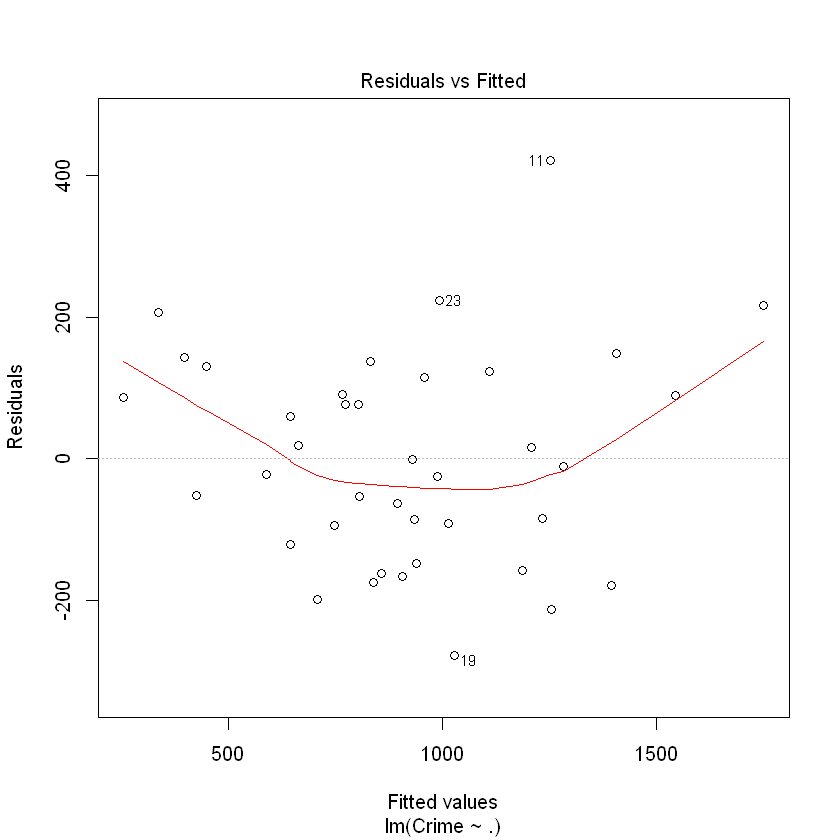

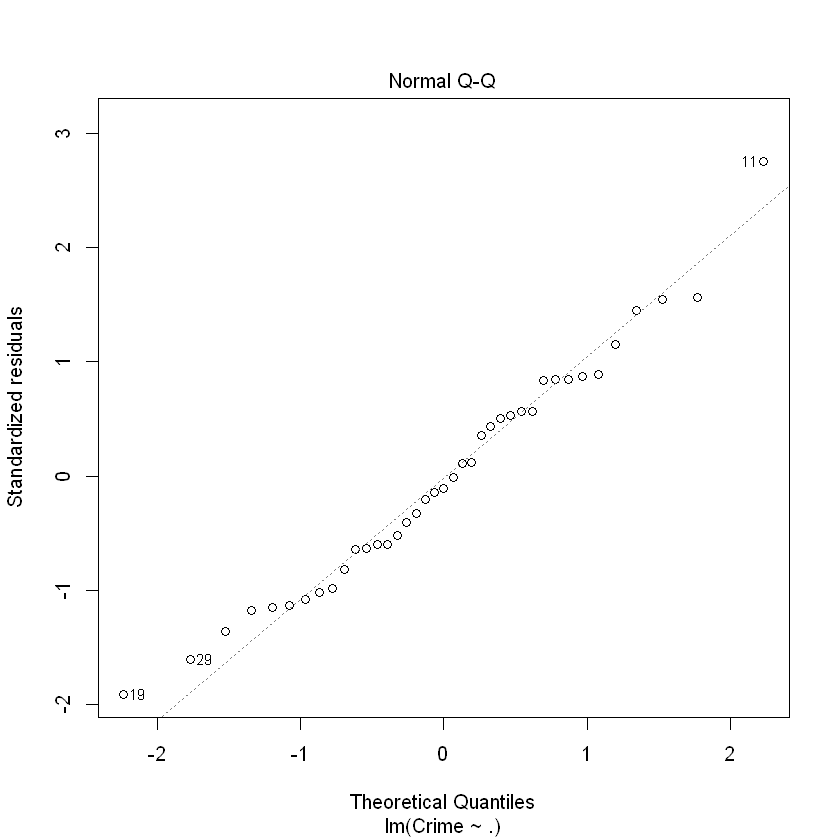

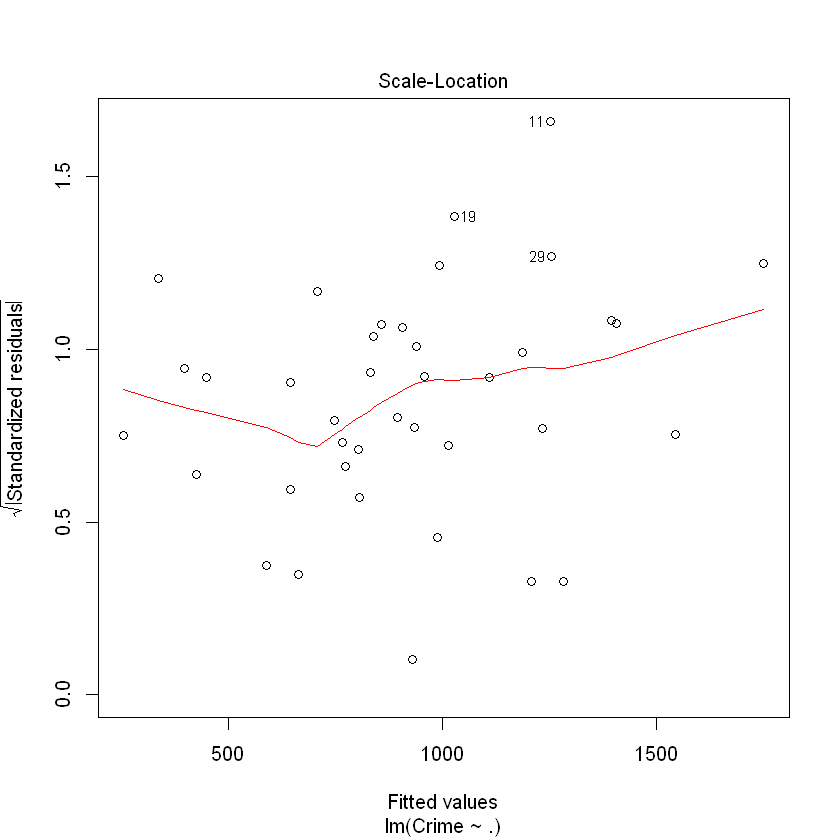

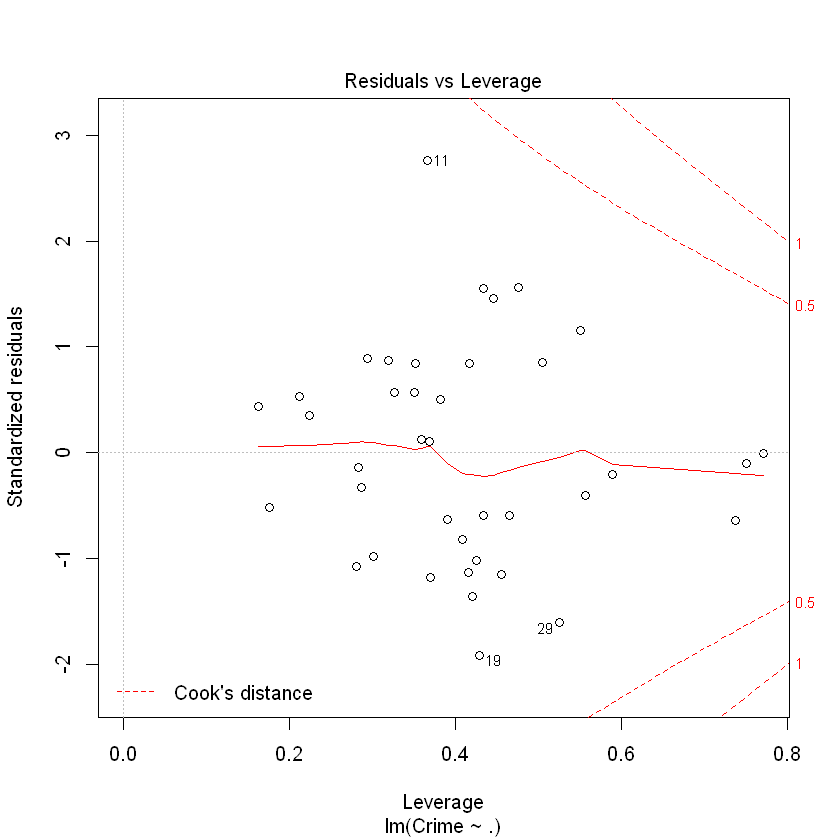

In [18]:
plot(m1_all_features_train_model)



### All features linear regresssion model summary



In [19]:
m1_model_summary <- summary(m1_all_features_train_model)
m1_model_summary


Call:
lm(formula = Crime ~ ., data = split_data_set$train)

Residuals:
   Min     1Q Median     3Q    Max 
-277.2 -107.4  -10.3  102.4  420.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7748.3403  1871.2820  -4.141 0.000397 ***
M              78.8164    45.3423   1.738 0.095538 .  
So            -21.9733   166.2354  -0.132 0.895990    
Ed            232.2737    64.0293   3.628 0.001411 ** 
Po1           218.5369   110.5289   1.977 0.060127 .  
Po2          -143.8749   118.6797  -1.212 0.237706    
LF          -2419.6839  1606.8639  -1.506 0.145719    
M.F            32.2196    23.4877   1.372 0.183371    
Pop            -1.3922     1.3687  -1.017 0.319672    
NW              1.0718    10.8211   0.099 0.921956    
U1          -8547.4548  4627.0875  -1.847 0.077613 .  
U2            210.5943    87.7046   2.401 0.024821 *  
Wealth          0.1415     0.1065   1.329 0.196834    
Ineq          100.3967    24.1645   4.155 0.000383 ***
Prob        -250



### Signficant predictors

Let's extract the most statistically significant predictors from the linear regression model.

reference: https://stackoverflow.com/a/40206080

In [20]:
# reference: https://stackoverflow.com/a/40206080

m1_cc <- coef(m1_model_summary)  ## coefficient table
m1_t5_significant_predictors <- names(sort(m1_cc[-1,"Pr(>|t|)"])[c(1:5)])
m1_t5_significant_predictors

[1] "Ineq" "Ed"   "U2"   "Po1"  "U1"



The most significant predictors by p-value measure in descending order:

* Ineq: Income inequality (percentage of families earning below half the median income)
* Ed: Mean years of schooling of the population aged 25 years or over
* U2: Unemployment rate of urban males 35–39
* Po1: Per capita expenditure on police protection in 1960
* U1: Unemployment rate of urban males 18–24






### Interpret all features linear regression model coefficients



In [21]:
sort(m1_all_features_train_model$coefficients,
     decreasing=T)

m1_t5_highest_coefficients <-
    names(sort(m1_all_features_train_model$coefficients,
               decreasing = T)[c(1:5)])

Ed           Po1            U2          Ineq             M 
  232.2736730   218.5369112   210.5942725   100.3966850    78.8164477 
          M.F          Time            NW        Wealth           Pop 
   32.2195944     8.5421326     1.0718335     0.1415271    -1.3921559 
           So           Po2            LF          Prob   (Intercept) 
  -21.9733155  -143.8748615 -2419.6838712 -2503.6504831 -7748.3403296 
           U1 
-8547.4548388



The top five contributing predictors to the target variable `Crime`  by coefficient are listed below:

* U2: Unemployment rate of urban males 35–39
* Po1: Per capita expenditure on police protection in 1960
* Ed: Mean years of schooling of the population aged 25 years or over
* M: Percentage of males aged 14–24 in total state population
* Ineq: Income inequality (percentage of families earning below half the median income)


The least contributing predictors to the target variable `Crime`  by coefficient (descending order) include:

* Prob: Probability of imprisonment (ratio of number of commitments to number of offenses)
* LF: Labour force participation rate of civilian urban males in the age-group 14-24






### All features linear regression model error



In [22]:
# Model prediction MSE on validation set

m1_all_features_model_validation_preds <- 
    predict(m1_all_features_train_model,
            split_data_set$validate[-16])

m1_all_features_validation_results <-
    cbind(m1_all_features_model_validation_preds,
          split_data_set$validate[16]) 

colnames(m1_all_features_validation_results) <- c('pred','real')

m1_all_features_validation_results <-
    as.data.frame(m1_all_features_validation_results)
m1_all_features_validation_results

validation_real_Crime <- m1_all_features_validation_results$real
m1_validation_pred_Crime <- m1_all_features_validation_results$pred

,pred,real
13,920.8030,511
15,1155.7308,798
16,1096.1873,946
22,962.0626,439
26,2017.7279,1993
39,992.4403,826
43,1381.9134,823
45,967.4951,455


In [23]:
# Mean squared error

m1_all_features_mse <-
    mean((validation_real_Crime-m1_validation_pred_Crime)^2)
cat("Model MSE: ",m1_all_features_mse)

Model MSE:  149426.2

In [24]:
# Root mean squared error
cat("Model Root MSE: ",m1_all_features_mse ^ 0.5)

Model Root MSE:  386.5569



### Plot all features linear regression model residuals



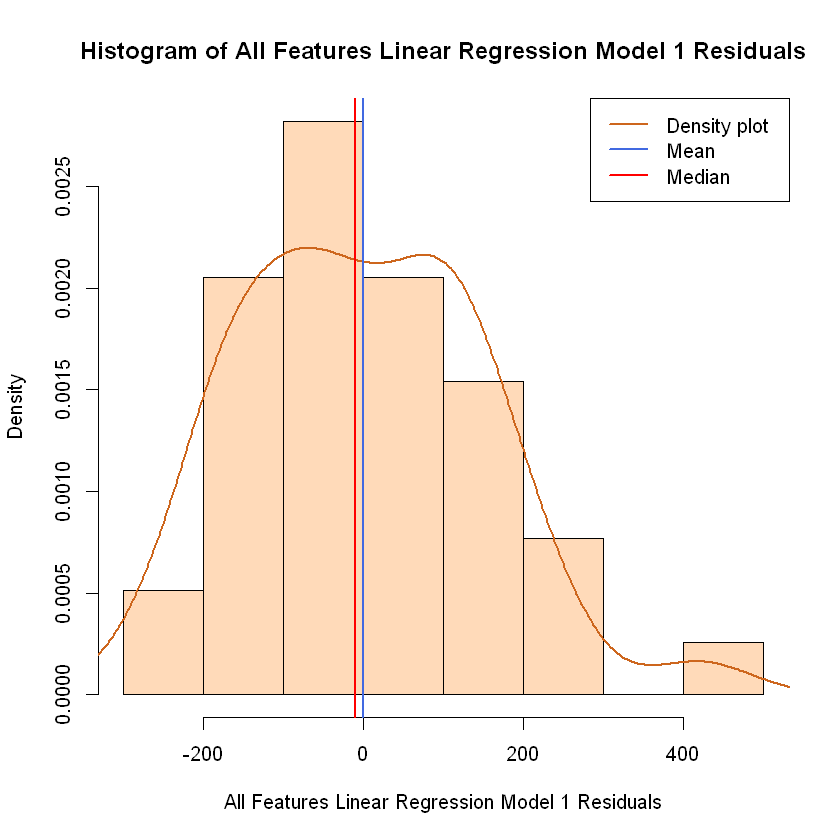

In [25]:
# Get residuals
res <- residuals(m1_all_features_train_model)

# Convert to numeric for hist
res <- as.numeric(res)

hist(res, probability = T,
     main = "Histogram of All Features Linear Regression Model 1 Residuals",
     col = "peachpuff",
     xlab="All Features Linear Regression Model 1 Residuals")
lines(density(res), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")
abline(v = mean(res),
 col = "royalblue",
 lwd = 2)
abline(v = median(res),
 col = "red",
 lwd = 2)
legend(x = "topright", # location of legend within plot area
 c("Density plot", "Mean", "Median"),
 col = c("chocolate3", "royalblue", "red"),
 lwd = c(2, 2, 2))



Our residuals are being skewed slightly towards the high-end (median < mean) by an outlier (tail on right hand side), but are more or less normally distributed.





## Cross-validated linear regression model 1

reference: https://www.r-bloggers.com/a-quick-introduction-to-machine-learning-in-r-with-caret/

In [26]:
m2_all_features_model_cv <- train(Crime ~ .,
                                  rbind(split_data_set$train,
                                        split_data_set$validate),
                                        method = "lm",
                                        trControl=train_control)



### Cross-validation training set



In [27]:
m2_all_features_model_cv

Linear Regression 

47 samples
15 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 43, 41, 42, 43, 42, 43, ... 
Resampling results:

  RMSE      Rsquared 
  256.2904  0.5984653

Tuning parameter 'intercept' was held constant at a value of TRUE



### Cross-validated model 1 training accuracy



In [28]:
m2_all_features_model_cv$results$Rsquared

[1] 0.5984653



### Cross-validated model 1 training error



In [29]:
1-m2_all_features_model_cv$results$Rsquared

[1] 0.4015347



### Cross-validated model 1 important attributes



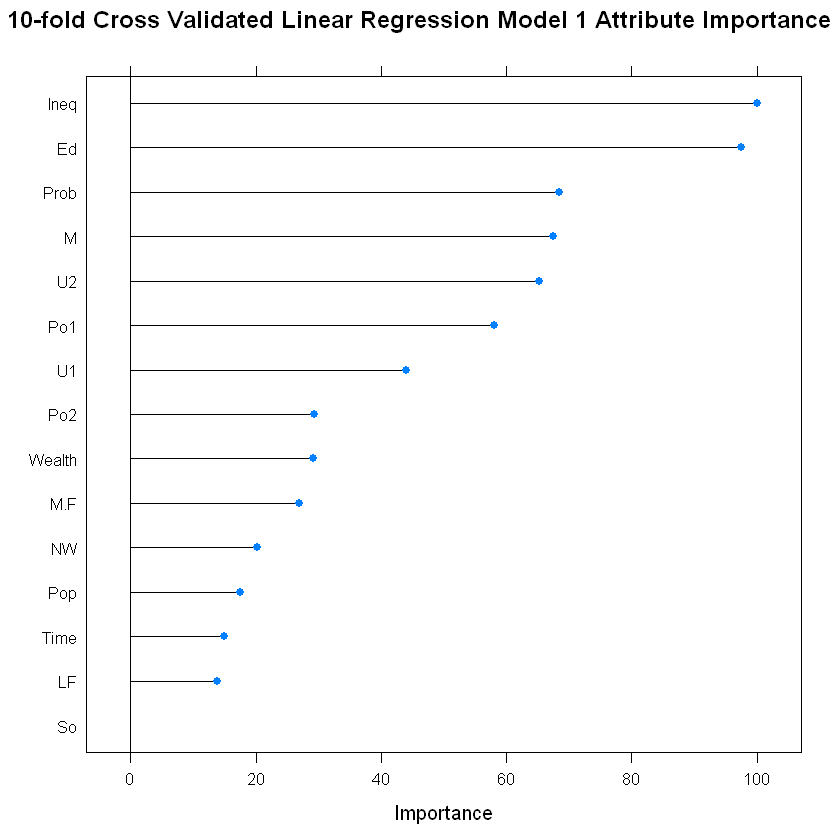

In [30]:
plot(varImp(object=m2_all_features_model_cv),
     main="10-fold Cross Validated Linear Regression Model 1 Attribute Importance")



The top five contributing predictors to the target variable `Crime`  by coefficient are listed below:

* Ineq: Income inequality (percentage of families earning below half the median income)
* Ed: Mean years of schooling of the population aged 25 years or over
* Prob: Probability of imprisonment (ratio of number of commitments to number of offenses)
* M: Percentage of males aged 14–24 in total state population
* U2: Unemployment rate of urban males 35–39



In [31]:
cv_t5_features <- c("Ineq", "Ed", "Prob", "M", "U2")



### Plot all features CV linear regression model residuals



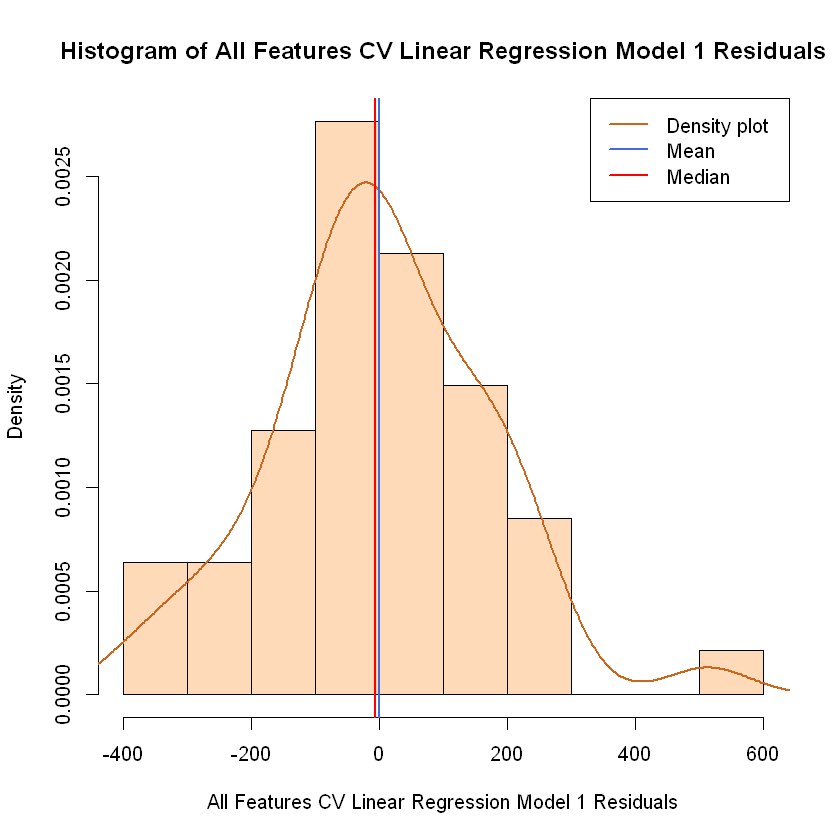

In [32]:
# Grab residuals
res <- residuals(m2_all_features_model_cv)

# Convert to numeric for hist
res <- as.numeric(res)

hist(res, probability = T,
     main = "Histogram of All Features CV Linear Regression Model 1 Residuals",
     col = "peachpuff",
     xlab="All Features CV Linear Regression Model 1 Residuals")
lines(density(res), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")
abline(v = mean(res),
 col = "royalblue",
 lwd = 2)
abline(v = median(res),
 col = "red",
 lwd = 2)
legend(x = "topright", # location of legend within plot area
 c("Density plot", "Mean", "Median"),
 col = c("chocolate3", "royalblue", "red"),
 lwd = c(2, 2, 2))



### Commentary

Both the cross-validated approach and the manual data split approach used in model 1 m1 point to the contributions of the attributes:

* Ineq
* Ed
* U2
* M





## Linear regression model building: important features

Our second linear regression model will include only important features and without any outliers removed. My hypothesis is that our model's MSE error will increase only slightly because we are still using the most important predictors to predict the target variable `Crime`. Remember that any model built with all n predictors will have a lower MSE then a model built with n-k predictors where k is the number of predictors removed. I will be using predictor variable coeffecients from our original model m1 that included all features to determine predictor importance.





### Manual Split





### Only use important features from first linear regression model



In [33]:
m1_t5_highest_coefficients

[1] "Ed"   "Po1"  "U2"   "Ineq" "M"

In [34]:
t5_Coeff_features_regression_formula <- paste(m1_t5_highest_coefficients,collapse='+')
t5_Coeff_features_regression_formula <- paste("Crime~ ",
                                              t5_Coeff_features_regression_formula,
                                              sep=' ')
t5_Coeff_features_regression_formula

[1] "Crime~  Ed+Po1+U2+Ineq+M"

In [35]:
m3_t5_important_features_all_data_train_model <-
    lm(t5_Coeff_features_regression_formula,
       split_data_set$train)



### Top 5 important features linear regression training model summary



In [36]:
summary(m3_t5_important_features_all_data_train_model)


Call:
lm(formula = t5_Coeff_features_regression_formula, data = split_data_set$train)

Residuals:
   Min     1Q Median     3Q    Max 
-402.8  -98.8  -22.7  120.3  638.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5317.41    1006.50  -5.283 8.00e-06 ***
Ed            201.28      49.34   4.079 0.000269 ***
Po1           117.09      15.59   7.511 1.23e-08 ***
U2            103.08      48.77   2.114 0.042175 *  
Ineq           74.15      15.87   4.673 4.82e-05 ***
M              96.88      38.36   2.525 0.016538 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 213.2 on 33 degrees of freedom
Multiple R-squared:  0.7053,	Adjusted R-squared:  0.6606 
F-statistic: 15.79 on 5 and 33 DF,  p-value: 6.076e-08


In [37]:
# Model with most important features present performance vs model with all attributes performance

0.6606/0.7259

[1] 0.9100427



From the summaries of both our first model m1 and our third model m3, we can see that the model m3 which contains only the top 5 predictors (determined by coefficient values) captures ~ 91% of the behavior of model m1 as evidenced by their adjusted R squared value (0.6606/0.7259) on the training data set. Adjusted R squared should not be the only model selection criteria used to determine the optimal model, however, it gives us an easy means to quickly compare two models performance. For more on model selection see awesome reference below:

http://statweb.stanford.edu/~jtaylo/courses/stats203/notes/selection.pdf





### Top 5 important features linear regression training model plots



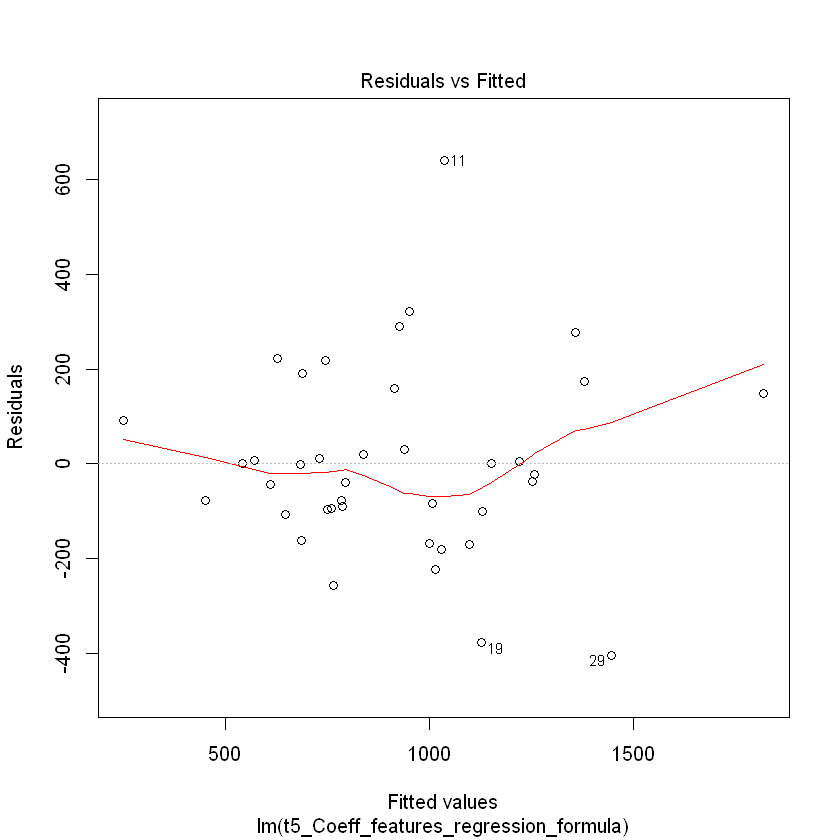

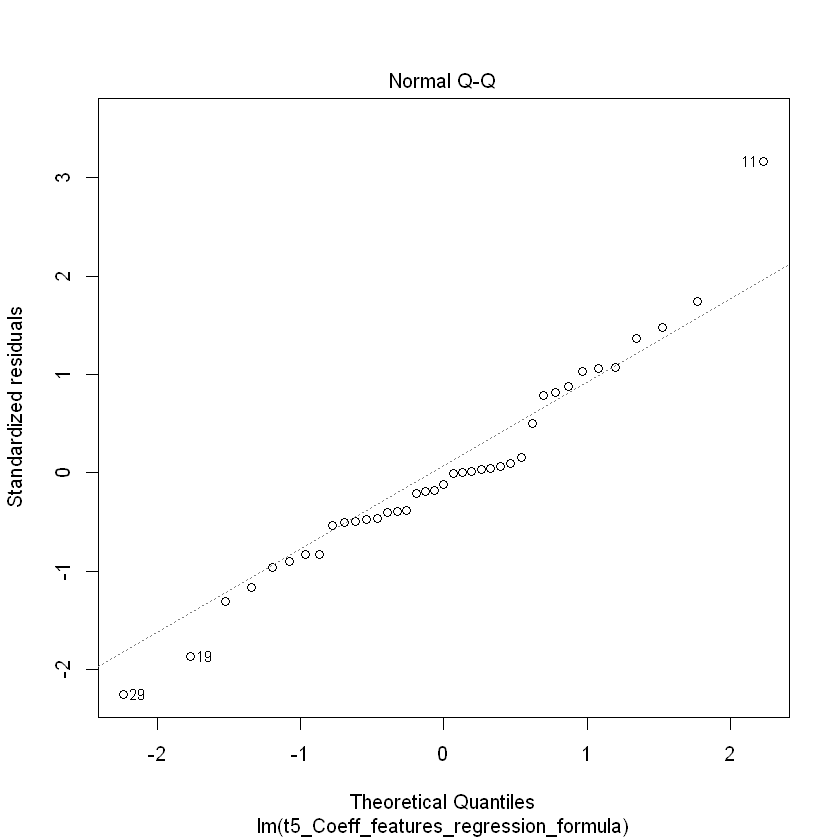

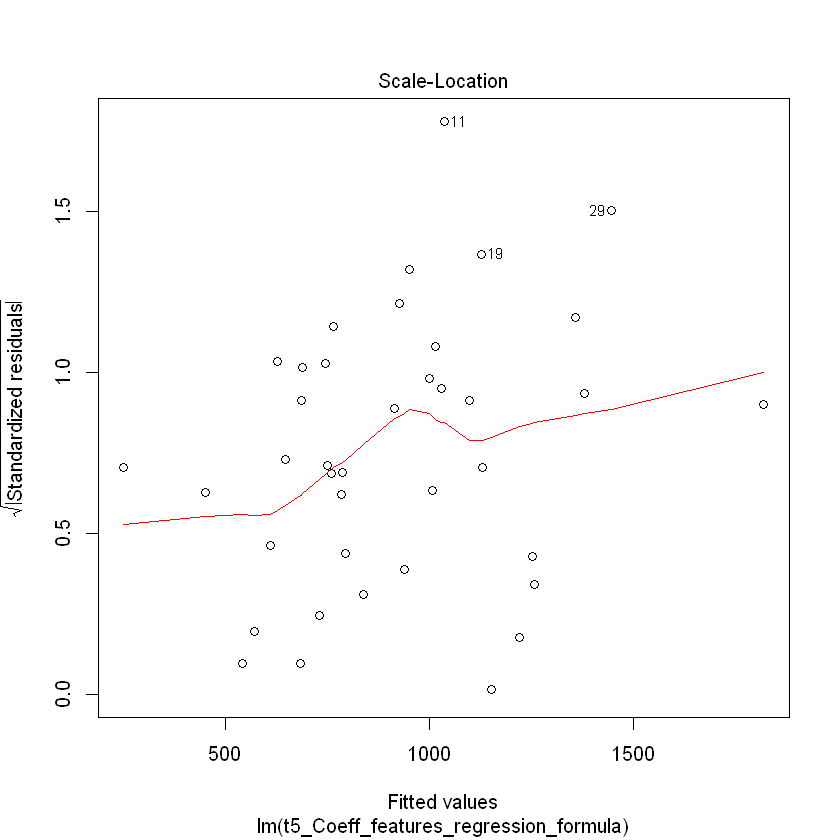

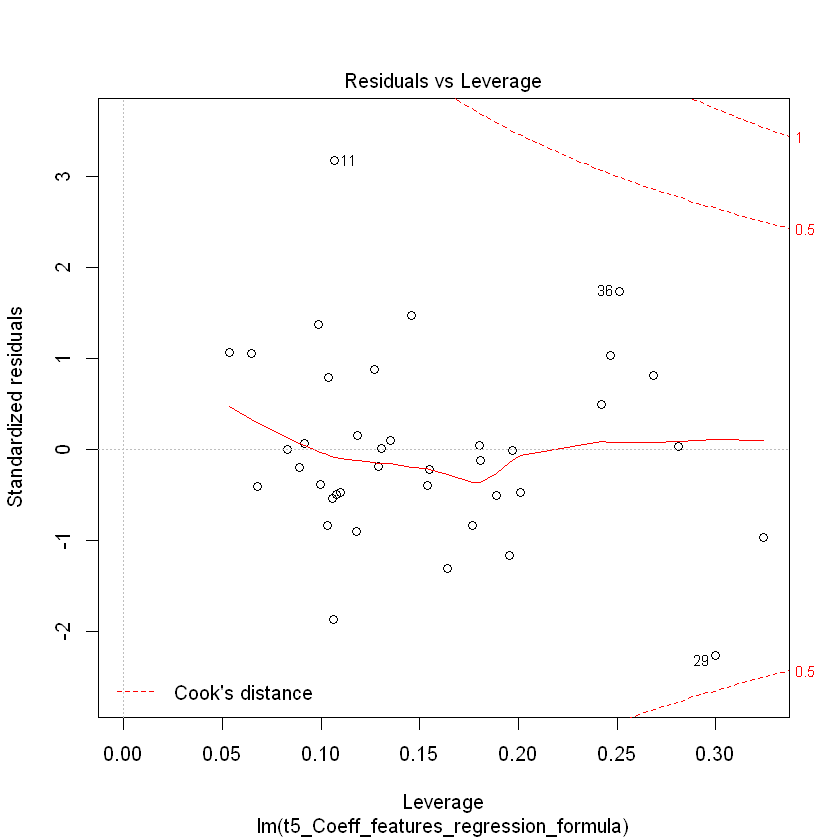

In [38]:
plot(m3_t5_important_features_all_data_train_model)



### Top 5 important features linear regression model prediction error on validation set

Now we are ready to make predictions on our validation dataset. Models m1 and m3 are to be compared based on their performance on the validation dataset. I will use root MSE to compare the two, but first let's calculate MSE for model m3.



In [39]:
m3_t5_significant_features_model_validation_preds <-
    predict(m3_t5_important_features_all_data_train_model,
            split_data_set$validate[-16])

m3_t5_significant_features_model_validation_results <-
    cbind(m3_t5_significant_features_model_validation_preds,
          split_data_set$validate[16]) 

colnames(m3_t5_significant_features_model_validation_results) <-
    c('pred','real')

m3_t5_significant_features_results <-
    as.data.frame(m3_t5_significant_features_model_validation_results)
m3_t5_significant_features_model_validation_results

m3_t5_significant_features_model_mse <-
    mean((m3_t5_significant_features_model_validation_results$real-
          m3_t5_significant_features_model_validation_results$pred)^2)

cat("Model MSE: ",m3_t5_significant_features_model_mse)

,pred,real
13,766.7992,511
15,974.4994,798
16,1093.9337,946
22,942.3151,439
26,1810.3020,1993
39,833.5371,826
43,1062.1351,823
45,731.7522,455


Model MSE:  67376.06

In [40]:
# Model mean squared error
cat("Model Root MSE: ",m3_t5_significant_features_model_mse ^ 0.5)

Model Root MSE:  259.569



## Cross-validated model 4



In [41]:
m1_t5_highest_coefficients

[1] "Ed"   "Po1"  "U2"   "Ineq" "M"

In [42]:
t5_Coeff_features_regression_formula

[1] "Crime~  Ed+Po1+U2+Ineq+M"

In [43]:
m4_t5_significant_features_model_cv <- train(Crime~ U2+Po1+Ed+M+Ineq,
                                            rbind(split_data_set$train,
                                            split_data_set$validate),
                                            method = "lm",
                                            trControl=train_control)

In [44]:
m4_t5_significant_features_model_cv

Linear Regression 

47 samples
 5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 41, 43, 43, 42, 43, 43, ... 
Resampling results:

  RMSE      Rsquared 
  213.5381  0.6685979

Tuning parameter 'intercept' was held constant at a value of TRUE



### Cross-validated all features linear regression model 4 training model summary



In [45]:
summary(m4_t5_significant_features_model_cv)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-453.44  -98.59  -18.07  106.03  629.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5243.74     951.16  -5.513 2.13e-06 ***
U2             91.36      43.41   2.105 0.041496 *  
Po1           123.31      14.16   8.706 7.26e-11 ***
Ed            203.08      47.42   4.283 0.000109 ***
M             101.98      35.32   2.887 0.006175 ** 
Ineq           63.49      14.68   4.324 9.56e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 213 on 41 degrees of freedom
Multiple R-squared:  0.7296,	Adjusted R-squared:  0.6967 
F-statistic: 22.13 on 5 and 41 DF,  p-value: 1.105e-10




### Cross-validated model 4 accuracy



In [46]:
m4_t5_significant_features_model_cv$results$Rsquared

[1] 0.6685979



### Cross-validated model 4 error



In [47]:
1-m4_t5_significant_features_model_cv$results$Rsquared

[1] 0.3314021



### Comparing all features model with top 5 features model performance



In [48]:


### Comparing all features model with top 5 features model performance

# Root mean squared error
cat('Split data models: \n\n')
cat("Model 1 All Features Split Data Root MSE: ",
    m1_all_features_mse ^ 0.5)
cat('\n')
cat("Model 3 Top 5 Features Split Data Root MSE: ",
    m3_t5_significant_features_model_mse ^ 0.5)
cat('\n\nCross-validation models: \n\n')
cat("Model 2 All Features Cross-Validated Rsquared: ",
    m2_all_features_model_cv$results$Rsquared)
cat('\n')
cat("Model 4 Top 5 Features Cross-Validated RSquared: ",
    m4_t5_significant_features_model_cv$results$Rsquared)

Split data models: 

Model 1 All Features Split Data Root MSE:  386.5569
Model 3 Top 5 Features Split Data Root MSE:  259.569

Cross-validation models: 

Model 2 All Features Cross-Validated Rsquared:  0.5984653
Model 4 Top 5 Features Cross-Validated RSquared:  0.6685979



## Linear regression model all features trained on all data points performance on test set

Let's use all data and all features in the linear rgeression model and train. After training we will predict on the test point.



In [49]:
# test set
test <- data.frame(M = 14.0,
                   So = 0,
                   Ed = 10.0,
                   Po1 = 12.0,
                   Po2 = 15.5,
                   LF = 0.640,
                   M.F = 94.0,
                   Pop = 150,
                   NW = 1.1,
                   U1 = 0.120,
                   U2 = 3.6,
                   Wealth = 3200,
                   Ineq = 20.1,
                   Prob = 0.04,
                   Time = 39.0)
test

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
14,0,10,12,15.5,0.64,94,150,1.1,0.12,3.6,3200,20.1,0.04,39


In [50]:
m5_final_model_all_features <- lm(Crime~ .,data)
m5_final_model_t5_features <- lm(Crime~ U2+Po1+Ed+M+Ineq,data)

In [51]:
m5_final_model_all_feats_test_pred <-
    predict(m5_final_model_all_features,test)

cat("All features Test point Crime: ",m5_final_model_all_feats_test_pred)

All features Test point Crime:  155.4349



The predicted value for Crime from the model with all features is way too low compared to the model output of the top 5 features linear regression model. More evidence for better feature selection.





## Linear regression model t5 features trained on all data points performance on test set

Let's use all data and only the top 5 contributing features in the linear regression model and train. After training we will predict on the test point.



In [52]:
test_points_t5_attributes <-
    test[colnames(test) %in% m1_t5_highest_coefficients]

test_points_t5_attributes

M,Ed,Po1,U2,Ineq
14,10,12,3.6,20.1


In [53]:
m6_final_model_t5_features <-
    lm(t5_Coeff_features_regression_formula,data)



### Final t5 feature model summary



In [54]:
summary(m6_final_model_t5_features)


Call:
lm(formula = t5_Coeff_features_regression_formula, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-453.44  -98.59  -18.07  106.03  629.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5243.74     951.16  -5.513 2.13e-06 ***
Ed            203.08      47.42   4.283 0.000109 ***
Po1           123.31      14.16   8.706 7.26e-11 ***
U2             91.36      43.41   2.105 0.041496 *  
Ineq           63.49      14.68   4.324 9.56e-05 ***
M             101.98      35.32   2.887 0.006175 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 213 on 41 degrees of freedom
Multiple R-squared:  0.7296,	Adjusted R-squared:  0.6967 
F-statistic: 22.13 on 5 and 41 DF,  p-value: 1.105e-10


In [56]:
cat("All features Test point Crime: ",m5_final_model_all_feats_test_pred)
cat("\n")

cat("Top 5 features Test point Crime: ",m6_final_model_t5_pred)

All features Test point Crime:  155.4349
Top 5 features Test point Crime:  1299.626



This value seems much more consistent with its nearest neighbors predictions for crime. The main takeaways from this exercise are always perform cross-validation to minimize bias and the chance of overfitting and strive to create simpler models that rely on fewer attributes. Our optimal model ended up being the model that used the top 5 contributing features to `Crime`. One final takeaway is to holistically evaluate models and not just conduct model selection using a single value of model accuracy. Our optimal model still had to pass the sanity check for the `Crime` value predicted.

